In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("bank-additional-full.csv",sep = ";")

In [3]:
df = pd.DataFrame(data)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# Check class balance
print(df["y"].value_counts())
print(df["y"].value_counts(normalize=True))

y
no     36548
yes     4640
Name: count, dtype: int64
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


The column duration was removed because it introduces data leakage.
Duration refers to the length of the last phone call, which is only known after contacting the customer.Our goal is to predict subscription before the call; therefore, this feature would not be available in real-world predictions and would lead to artificially inflated accuracy.

In [6]:
df = df.drop('duration', axis=1)

In this dataset, the value 999 in the pdays column means the client was never contacted before in a previous marketing campaign.
We convert this into a new binary feature:

1 : client was contacted before

0 : client was never contacted before

This makes the information easier for the model to understand and improves prediction quality.

In [7]:
df['was_contacted_before'] = (df['pdays'] != 999).astype(int)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,was_contacted_before
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [8]:
# Split Features and Target
X = df.drop('y', axis=1)
y = df['y'].map({'no':0, 'yes':1})

In [9]:
# Identify Categorical and Numerical Columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

cat_cols, num_cols

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'],
 ['age',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'was_contacted_before'])

Numeric Features

- Missing values are handled using median imputation

- Values are scaled using StandardScaler to normalize the range of numeric data

Categorical Features

- Missing values are filled using the most frequent category

- Categories are converted into numeric format using One-Hot Encoding

- Unknown categories at prediction time are safely ignored to avoid errors

ColumnTransformer

- Combines both numeric and categorical pipelines

- Ensures the same preprocessing is applied during training and deployment

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

In [11]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

In [12]:
# Train Random Forest Model

from sklearn.ensemble import RandomForestClassifier

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=300,
            max_depth=None,
            min_samples_split=5,
            min_samples_leaf=2,
            class_weight="balanced",
            n_jobs=-1,
            random_state=42,
        )),
    ]
)

In [13]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'was_contacted_before']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, min_samples_split=5,
                                        n_estimators=300, n_jobs=-1,
                                        random_state=42))])

- predict_proba(X_test)[:, 1] gives the probability of the positive class (Yes).

- Metrics like ROC-AUC, PR-AUC, and threshold tuning require these probabilities, not just predicted labels.

- Since our objective is to identify customers likely to subscribe, we focus on the probability of class 1 (Yes) rather than only the final predicted label.

In [14]:
# Predictions and Evaluation

from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,average_precision_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))
print("\nConfusion Matrix\n",confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7310
           1       0.50      0.53      0.52       928

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

AUC: 0.8020231644181329
PR-AUC: 0.48406973889534366

Confusion Matrix
 [[6827  483]
 [ 437  491]]


Threshold Tuning for Better Prediction Performance

Instead of using the default classification threshold of 0.50, we evaluate multiple threshold values ranging from 0.1 to 0.9 to find the value that gives the highest F1-Score.
F1-Score is preferred in this project because it balances precision and recall, which is important for identifying potential subscribers without generating too many false calls.

We loop through different threshold values

- Convert probabilities into class predictions

- Calculate F1-Score for each threshold

- Select the threshold that gives the best overall balance

This optimized threshold is used in the final prediction and deployment to improve    real-world decision-making.

In [15]:
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.linspace(0.1, 0.9, 81)
scores = []

for t in thresholds:
    y_pred_adj = (y_prob >= t).astype(int)
    scores.append(f1_score(y_test, y_pred_adj))

best_threshold = thresholds[np.argmax(scores)]
best_f1 = max(scores)

print("Best Threshold:", best_threshold)
print("Best F1 Score:", best_f1)

Best Threshold: 0.45999999999999996
Best F1 Score: 0.5205751115518096


Evaluation with the Optimized Threshold

After identifying the best threshold using F1-Score, we apply this new threshold to convert predicted probabilities into class labels. This allows the model to make decisions that better align with our business objective—capturing more potential subscribers while keeping false calls manageable.

We then re-evaluate the model using this optimized threshold to compare performance against the default threshold and observe improvements in precision, recall, and F1-score for the positive class.

In [16]:
new_threshold = best_threshold  
y_pred_new = (y_prob >= new_threshold).astype(int)

print("=== Evaluation with New Threshold ===")
print(classification_report(y_test, y_pred_new))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))

=== Evaluation with New Threshold ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7310
           1       0.48      0.57      0.52       928

    accuracy                           0.88      8238
   macro avg       0.71      0.74      0.73      8238
weighted avg       0.89      0.88      0.89      8238

Confusion Matrix:
 [[6746  564]
 [ 403  525]]


Extracting Feature Names for Interpretation

To correctly display feature importance, we need the full list of feature names after preprocessing. Since the ColumnTransformer applies scaling to numeric features and one-hot encoding to categorical features, the number of columns increases and their names change.

- We retrieve the names of transformed numeric features

- We extract the one-hot encoded categorical feature names

- Finally, we combine them into a single list, which matches the feature order used by the trained model

This allows us to accurately map each importance score to its corresponding feature when visualizing or explaining the model’s decisions.

In [17]:
# Get the fitted preprocessor and model
rf_model = model.named_steps["model"]
preprocessor_fitted = model.named_steps["preprocessor"]

# Get numeric feature names
num_features = preprocessor_fitted.named_transformers_["num"].get_feature_names_out()

# Get categorical one-hot encoded feature names
cat_features = preprocessor_fitted.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out()

# Combine them
all_feature_names = np.concatenate([num_features, cat_features])


In [18]:
feat_imp = (
    pd.DataFrame({"feature": all_feature_names, "importance": rf_model.feature_importances_})
    .sort_values(by="importance", ascending=False)
)

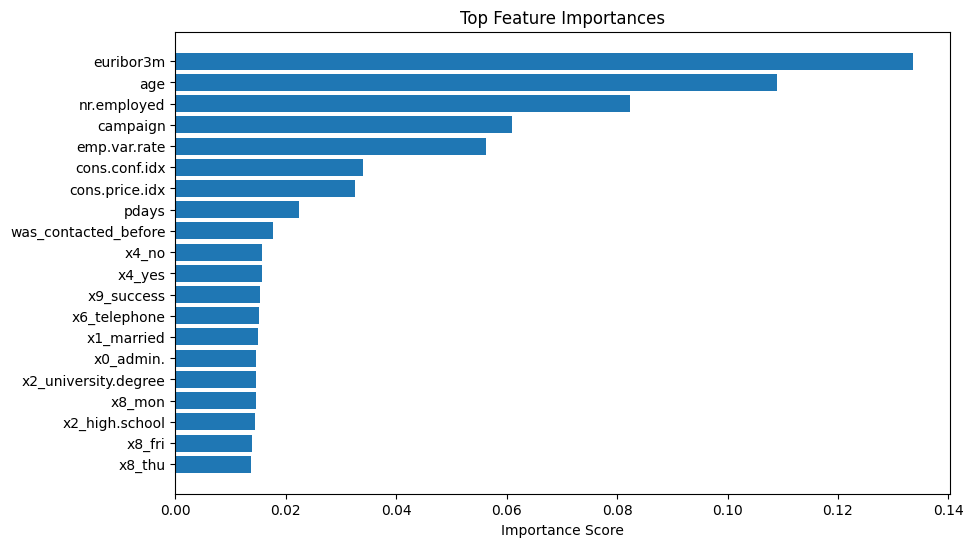

In [19]:
import matplotlib.pyplot as plt

top_n = 20  # number of top features to show
plt.figure(figsize=(10, 6))
plt.barh(feat_imp.head(top_n)["feature"], feat_imp.head(top_n)["importance"])
plt.gca().invert_yaxis()  # Highest at the top
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.show()

In [20]:
import joblib

# Save only the full pipeline (preprocessor + Random Forest)
joblib.dump(model, "model.pkl")

print("Saved model.pkl")

Saved model.pkl
